In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md
!pip install imbalanced-learn

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/opt/conda/lib/python3.10/site-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/opt/conda/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py", line 790, in urlopen
    response = self._make_request(
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py", line 491, in _make_request
    raise new_e
  File "/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py", li

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import joblib
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import spacy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def create_likes_classes(likes):
    if likes <= 100:
        return '0-100'
    elif 100 < likes <= 1000:
        return '100-1000'
    elif 1000 < likes <= 5000:
        return '1000-5000'
    elif 5000 < likes <= 10000:
        return '5000-10000'
    elif 10000 < likes <= 100000:
        return '10000-100000'
    else:
        return '100000-1000000'

In [ ]:
data_path = '../Datasets/tweet_data3.csv'
df = pd.read_csv(data_path)
df['Likes_Class'] = df['Like Count'].apply(create_likes_classes)

In [ ]:
def clean_tweet(tweet):
    all_text  = re.sub("#\S*\s", "", tweet)
    all_text  = re.sub("W+", "", all_text)
    all_text  = re.sub("@\S*\s", "", all_text)
    all_text = re.sub(r'https?://\S+', '', all_text)
    all_text = re.sub(r'[^\x00-\x7F]+', '', all_text)
    all_text.lower()
    return all_text

def standard_time(timeST):
    timestamp = datetime.strptime(timeST, "%Y-%m-%dT%H:%M:%S.%fZ")
    hour = timestamp.hour
    minute = timestamp.minute
    second = timestamp.second
    time_numeric = (hour * 3600) + (minute * 60) + second
    return time_numeric

In [ ]:
import re
df['clean tweet'] = df['Tweet Text'].apply(clean_tweet)
print (df['clean tweet'].iloc[100])

Daily reminder to pray a Pater, Ave and Gloria for the conversion of George Soros and Bill &amp; Melinda Gates All welcome to join in


In [ ]:
from pathlib import Path
model_path = "/kaggle/input/en-md2/en_core_web_md-3.0.0/en_core_web_md/en_core_web_md-3.0.0"
vi = Path(model_path)
nlp = spacy.util.load_model_from_path(vi)

In [ ]:
from datetime import datetime

In [ ]:
from tqdm import tqdm

In [ ]:
# data_path = '/kaggle/input/bst-300k/behaviour_simulation_train.csv'
# df = pd.read_csv(data_path)

# # making a split for test-train
# df=df[:290000]

# # Load the spaCy model with word vectors
# nlp = spacy.load("en_core_web_md")

# # Create a new column 'Likes_Class' with classes based on the number of likes
# df['Likes_Class'] = df['likes'].apply(create_likes_classes)

# Split the data into training and testing sets for classification
X_classification = df[['clean tweet', 'Followers Count', 'Time of Tweet']][:10000]  # Include 'Date', 'Company', and 'Label'
y_classification = df['Like Count'][:10000]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_classification, y_classification, test_size=0.99, random_state=42)

                                             clean tweet  Followers Count  \
0                                    giving me the ickkk             4017   
1      Amber heard (2009) an abuser who is being prot...               50   
2      The can write 2022 Report on Human Rights + De...           218481   
3      The remaining PORSCH NFT are now available to ...              244   
4      Nubiles Porn - MaryJane Johnson fucked every w...                0   
...                                                  ...              ...   
18045  Every Pisce has some crazy secrects they will ...           221582   
18046  Mom and pop place that ended up tasting pretty...             1039   
18047  Hey fam. Im working on a DEI presentation for ...               87   
18048                          EXCITING NES FROM JR ARD             35959   
18049  "Becoming less reactive is a huge part of grow...           654950   

                  Time of Tweet  
0      2023-01-30T07:00:20.000Z  
1      

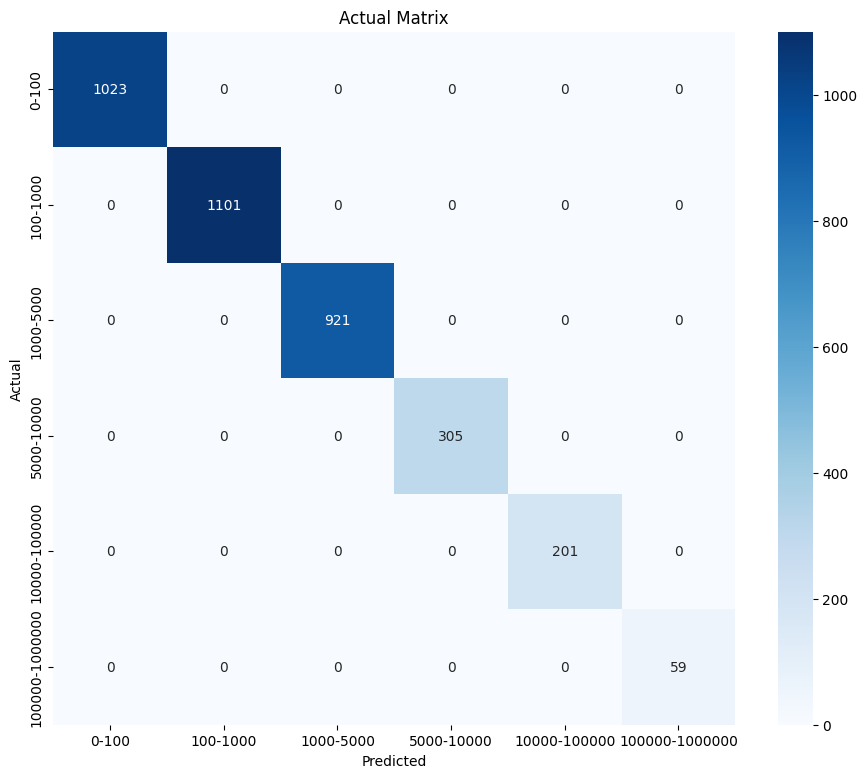

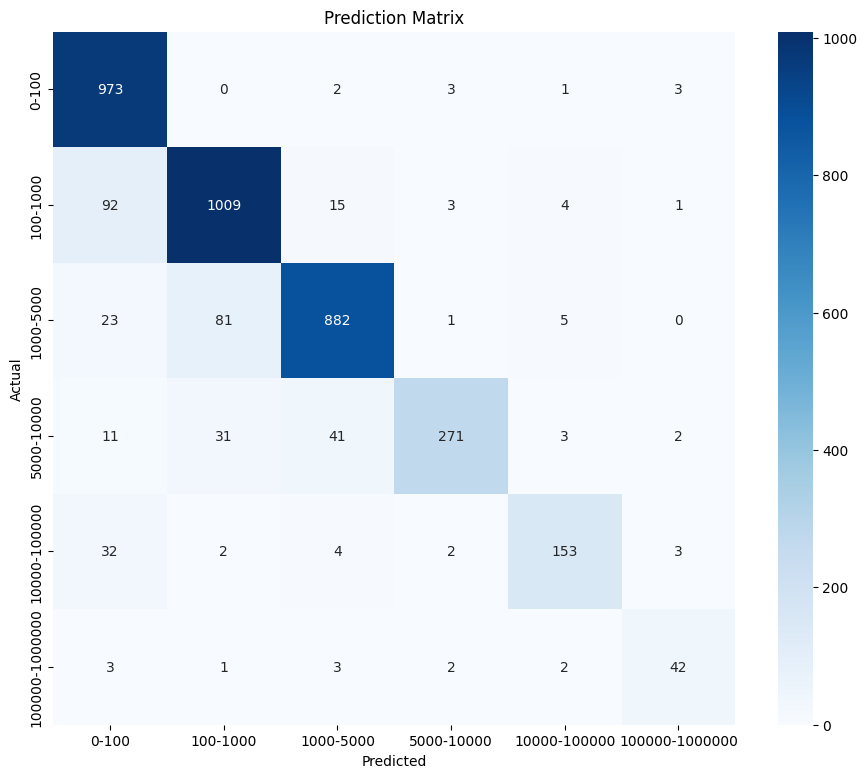

Classification Accuracy: 92.4%


In [ ]:
# data_path = '/kaggle/input/bst-300k/behaviour_simulation_train.csv'
# df = pd.read_csv(data_path)

# # making a split for test-train
# df=df[:290000]

# # Load the spaCy model with word vectors
# nlp = spacy.load("en_core_web_md")

# # Create a new column 'Likes_Class' with classes based on the number of likes
# df['Likes_Class'] = df['likes'].apply(create_likes_classes)

# Split the data into training and testing sets for classification
X_classification = df[['clean tweet', 'Followers Count', 'Time of Tweet']] # Include 'Date', 'Company', and 'Label'
y_classification = df['Likes_Class']

# Get word embeddings for the 'Content' column
X_text_embeddings = []
X_followers_embeddings = []
X_date_embeddings = []
print(X_classification)

import seaborn as sns
import matplotlib.pyplot as plt


for content in X_classification['clean tweet']:
    doc = nlp(content)
    # Average word vectors to get a single vector for the entire text
    content_embedding = doc.vector
    X_text_embeddings.append(content_embedding)
for c in X_classification['Followers Count']:
    X_followers_embeddings.append(c)
for c in X_classification['Time of Tweet']:
    X_date_embeddings.append(standard_time(c))

X_text_embeddings_df = pd.DataFrame(X_text_embeddings)
X_followers_embeddings_df = pd.DataFrame(X_followers_embeddings)
X_date_embeddings_df = pd.DataFrame(X_date_embeddings)
# Combine embeddings with other features

X_combined3 = pd.concat([ X_text_embeddings_df, X_followers_embeddings_df, X_date_embeddings_df], axis=1)
# # oversampling the data
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X_combined3, y_classification)

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined3, y_classification, test_size=0.2, random_state=42)
# # Train the classifier
classifier = RandomForestClassifier(n_estimators=200,max_depth=50,class_weight='balanced', random_state=46)
classifier.fit(X_train, y_train)
# # Make predictions on the test set
y_pred = classifier.predict(X_test)
joblib.dump(classifier, 'random_forest_classifier_bst-300k.joblib')
# # Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# Define class labels for plotting
class_labels = ['0-100', '100-1000', '1000-5000', '5000-10000', '10000-100000', '100000-1000000']

# Plot confusion matrix with custom values
plt.figure(figsize=(8, 6))
sns.heatmap(custom_values, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(f'Classification Accuracy: {accuracy * 100:.2f}%')